In [1]:
# -*- coding: utf-8 -*-
"""
Created on May 27, 2024
Last modified on June 12, 2024
@Author: Guan-Fu Liu

To provide some basic plots for analyses.
"""
from read_results import *
from matplotlib.gridspec import GridSpec

In [2]:
file_path = "./outputs/N13.h5"
yield_files, groups, ElemNotice, dfs, ElemIntersect, SNIaOn, mass_lifetime_file, mass_lifetime, SFH, StarInitElement,\
            StellarMass, StellarElement, SNccNum, SNIaNum, AGB_Num, GasElement, ZGas, EjectElement, SNccElement, SNIaElement,\
            AGB_Element, YieldsTable, IMF_type, IMF_data, creation_time, SFE, interp_kind, comments, solar_set = read_results(file_path)

The elements you notice but not available in the yield table of AGB+SNcc, Z_0_0001 are
 {'Metal'}
The elements you notice but not available in the yield table of AGB+SNcc, Z_0_0003 are
 {'Metal'}
The elements you notice but not available in the yield table of AGB+SNcc, Z_0_001 are
 {'Metal'}
The elements you notice but not available in the yield table of AGB+SNcc, Z_0_002 are
 {'Metal'}
The elements you notice but not available in the yield table of AGB+SNcc, Z_0_003 are
 {'Metal'}
The elements you notice but not available in the yield table of AGB+SNcc, Z_0_004 are
 {'Metal'}
The elements you notice but not available in the yield table of AGB+SNcc, Z_0_006 are
 {'Metal'}
The elements you notice but not available in the yield table of AGB+SNcc, Z_0_008 are
 {'Metal'}
The elements you notice but not available in the yield table of AGB+SNcc, Z_0_01 are
 {'Metal'}
The elements you notice but not available in the yield table of AGB+SNcc, Z_0_014 are
 {'Metal'}
The elements you notice but n

# A simple example for plotting the evolution of abundance ratios

The solar abundance table is only used in `ChemEvo.py` when generating the "primordial gas".
You could input the mass fraction of the metals except lithium ($Z_{0}$), and the code will redistribute the mass of metals except lithium following abundance ratios the solar abundance table. 
Usually, $Z_{0}$ is set to be zero, meaning the input solar abundance table does not take any effect on the output.

The mass of H, He, Li, ..., Zn in the output are in the unit of solar mass. 
The gas metallicity is defined as the mass fraction of metals in the gas.
For post-processing, you need to use a solar abundance table, since the abundances and gas metallicity are usually presented in the solar unit.
There are some built-in solar abundance tables in `constants.py`, and you can also use your own solar abundance table.
To get the abundance ratio like $O/Fe$, a function `GetZi2Zj` is provided in `read_results.py`.
Note the mass of metals like O, Fe, and etc. is usually **ZERO**, and hence you should skip the calculation of the primordial gas.

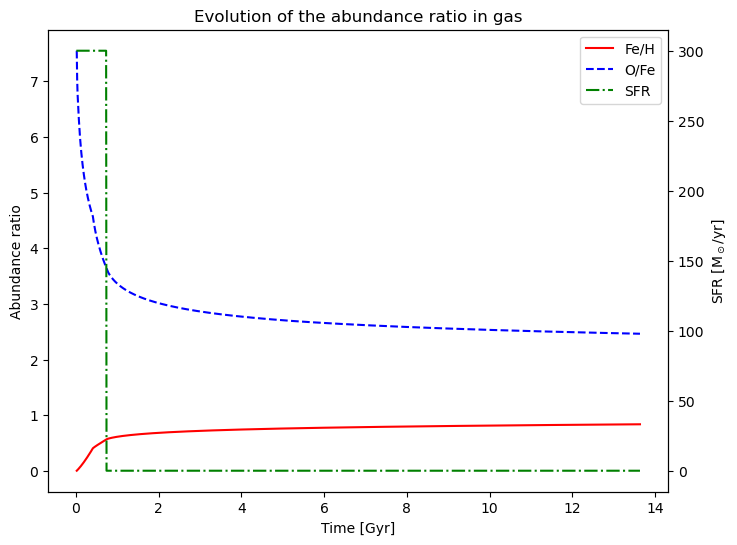

In [3]:
Zi2Zj = { }
Zi2Zj.update(GetZi2Zj(GasElement, "Fe", "H", solar_set, fill_value=None))
Zi2Zj.update(GetZi2Zj(GasElement, "O", "Fe", solar_set, fill_value=None))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
line1, = ax.plot(SFH['Age'][Zi2Zj['Fe/H-mask']]/1e9, Zi2Zj['Fe/H'], 'r-')
line2, = ax.plot(SFH['Age'][Zi2Zj['O/Fe-mask']]/1e9, Zi2Zj['O/Fe'], 'b--')
ax1 = ax.twinx()
line3, = ax1.plot(SFH['Age']/1e9, SFH['SFR'], 'g-.')
ax1.set_ylabel(r'SFR [M$_\odot$/yr]')
ax.legend([line1, line2, line3], ['Fe/H', 'O/Fe', 'SFR'])
ax.set_xlabel('Time [Gyr]')
ax.set_ylabel('Abundance ratio')
ax.set_title("Evolution of the abundance ratio in gas")
plt.show()

# A simple example for plotting the evolution of $M_{\star}$, $M_{\rm gas}$, $M_{\rm H, gas}$, $M_{\rm He, gas}$, and $M_{\rm Z, gas}$.

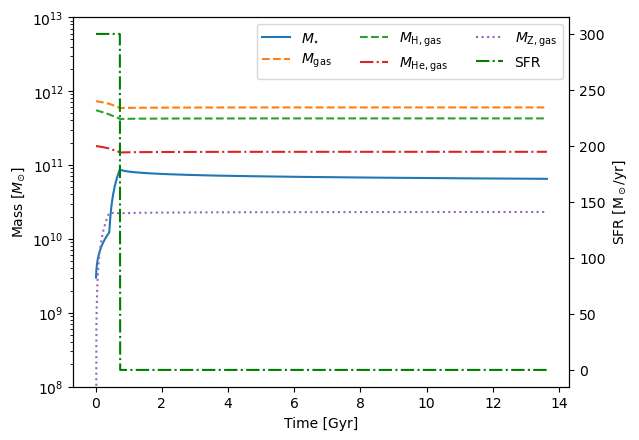

In [4]:
fig, ax = plt.subplots()
line1, = ax.plot(SFH['Age']/1e9, StellarMass, '-')
line2, = ax.plot(SFH['Age']/1e9, GasElement.sum(axis=1), '--')
line3, = ax.plot(SFH['Age']/1e9, GasElement[:, constants.elem_names.index('H')], '--')
line4, = ax.plot(SFH['Age']/1e9, GasElement[:, constants.elem_names.index('He')], '-.')
line5, = ax.plot(SFH['Age']/1e9, GasElement[:, constants.elem_names.index('Li'):].sum(axis=1), ':')

ax1 = ax.twinx()
line6, = ax1.plot(SFH['Age']/1e9, SFH['SFR'], 'g-.')
ax.set_xlabel('Time [Gyr]')
ax.set_ylabel(r'Mass [$M_{\odot}$]')
ax1.set_ylabel(r'SFR [M$_\odot$/yr]')
ax.legend([line1, line2, line3, line4, line5, line6], 
          [r'$M_{\star}$', r'$M_{\rm gas}$', r'$M_{\rm H, gas}$', r'$M_{\rm He, gas}$', r'$M_{\rm Z, gas}$', 'SFR'], ncol=3)

ax.semilogy()
ax.set_ylim(1e8, 1e13)
plt.show()

# A simple example for plotting the evolution of $M_{\rm ejecta, tot}$, $M_{\rm ejecta, AGB}$, $M_{\rm ejecta, SNIa}$, and $M_{\rm ejecta, SNcc}$.

$M_{\rm ejecta, AGB+SNIa+SNcc}\equiv = M_{\rm ejecta, AGB} + M_{\rm ejecta, SNIa} + M_{\rm ejecta, SNcc}$ should coincide with $M_{\rm ejecta, tot}$

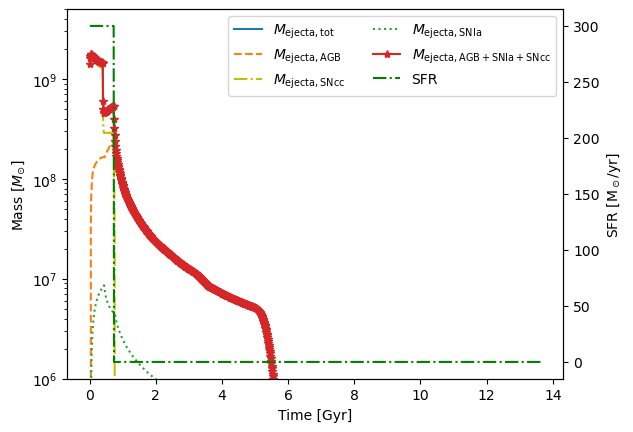

In [5]:
fig, ax = plt.subplots()
line1, = ax.plot(SFH['Age']/1e9, EjectElement.sum(axis=1), '-')
line2, = ax.plot(SFH['Age']/1e9, AGB_Element.sum(axis=1), '--')
line3, = ax.plot(SFH['Age']/1e9, SNccElement.sum(axis=1), 'y-.')
line4, = ax.plot(SFH['Age']/1e9, SNIaElement.sum(axis=1), ':')
line5, = ax.plot(SFH['Age']/1e9, (AGB_Element+SNIaElement+SNccElement).sum(axis=1), '-*')

ax1 = ax.twinx()
line6, = ax1.plot(SFH['Age']/1e9, SFH['SFR'], 'g-.')
ax.set_xlabel('Time [Gyr]')
ax.set_ylabel(r'Mass [$M_{\odot}$]')
ax1.set_ylabel(r'SFR [M$_\odot$/yr]')
ax.legend([line1, line2, line3, line4, line5, line6], 
          [r'$M_{\rm ejecta, tot}$', r'$M_{\rm ejecta, AGB}$', r'$M_{\rm ejecta, SNcc}$', 
           r'$M_{\rm ejecta,SNIa}$', r'$M_{\rm ejecta, AGB+SNIa+SNcc}$', 'SFR'], ncol=2)

ax.semilogy()
ax.set_ylim(1e6, 5e9)
plt.show()

# A simple example for plotting the evolution of the number of AGB, SNIa, and SNcc events.

There is a drop of the number of SNcc events at about 0.4 Gyr, which originates from the IMF slope changes from 1.3 to 1.35. 
For more details, see the file `./outputs/N13_imf_evolve.py`.

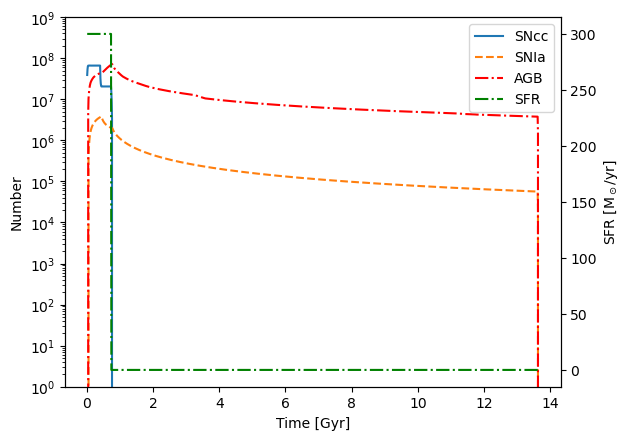

In [6]:
fig, ax = plt.subplots()
line1, = ax.plot(SFH['Age']/1e9, SNccNum, '-')
line2, = ax.plot(SFH['Age']/1e9, SNIaNum, '--')
line3, = ax.plot(SFH['Age']/1e9, AGB_Num, 'r-.')

ax1 = ax.twinx()
line4, = ax1.plot(SFH['Age']/1e9, SFH['SFR'], 'g-.')
ax.set_ylim(1, 1e9)
ax.semilogy()
ax.set_xlabel('Time [Gyr]')
ax.set_ylabel('Number')
ax1.set_ylabel(r'SFR [M$_\odot$/yr]')
ax.legend([line1, line2, line3, line4], ['SNcc', 'SNIa', 'AGB', 'SFR'])
plt.show()

# A simple example for plotting the gas metallicity $Z_{\rm gas}$.

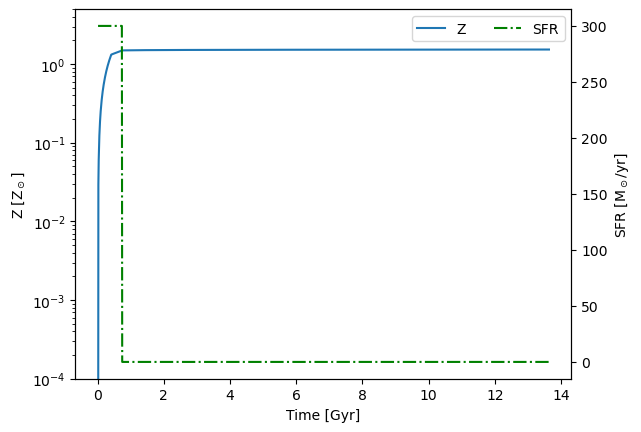

In [7]:
fig, ax = plt.subplots()
line1, = ax.plot(SFH['Age']/1e9, ZGas/constants.Z_sun[solar_set], '-')

ax1 = ax.twinx()
line2, = ax1.plot(SFH['Age']/1e9, SFH['SFR'], 'g-.')
ax.set_ylim(1e-4, 5)
ax.semilogy()
ax.set_xlabel('Time [Gyr]')
ax.set_ylabel(r'Z [Z$_\odot$]')
ax1.set_ylabel(r'SFR [M$_\odot$/yr]')
ax.legend([line1, line2], ['Z', 'SFR'], loc='upper right', ncol=2)
plt.show()